In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
counts = df_train.count()
counts[counts<260753] #which fields have empty cells?

PersonalField7     260640
PersonalField84    136545
PropertyField3     260672
PropertyField4     260690
PropertyField29     60068
PropertyField32    260683
PropertyField34    260683
PropertyField36    260640
PropertyField38    259533
dtype: int64

In [4]:
df_train.head()

,QuoteNumber,Original_Quote_Date,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,...,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64
0,1,2013-08-16,0,B,23,0.9403,0.0006,965,1.0200,N,...,9,9,-1,8,-1,18,-1,10,N,CA
1,2,2014-04-22,0,F,7,1.0006,0.0040,548,1.2433,N,...,10,10,-1,11,-1,17,-1,20,N,NJ
2,4,2014-08-25,0,F,7,1.0006,0.0040,548,1.2433,N,...,15,18,-1,21,-1,11,-1,8,N,NJ
3,6,2013-04-15,0,J,10,0.9769,0.0004,"1,165",1.2665,N,...,6,5,-1,10,-1,9,-1,21,N,TX
4,8,2014-01-25,0,E,23,0.9472,0.0006,"1,487",1.3045,N,...,18,22,-1,10,-1,11,-1,12,N,IL


In [5]:
df_train.columns.values

array(['QuoteNumber', 'Original_Quote_Date', 'QuoteConversion_Flag',
       'Field6', 'Field7', 'Field8', 'Field9', 'Field10', 'Field11',
       'Field12', 'CoverageField1A', 'CoverageField1B', 'CoverageField2A',
       'CoverageField2B', 'CoverageField3A', 'CoverageField3B',
       'CoverageField4A', 'CoverageField4B', 'CoverageField5A',
       'CoverageField5B', 'CoverageField6A', 'CoverageField6B',
       'CoverageField8', 'CoverageField9', 'CoverageField11A',
       'CoverageField11B', 'SalesField1A', 'SalesField1B', 'SalesField2A',
       'SalesField2B', 'SalesField3', 'SalesField4', 'SalesField5',
       'SalesField6', 'SalesField7', 'SalesField8', 'SalesField9',
       'SalesField10', 'SalesField11', 'SalesField12', 'SalesField13',
       'SalesField14', 'SalesField15', 'PersonalField1', 'PersonalField2',
       'PersonalField4A', 'PersonalField4B', 'PersonalField5',
       'PersonalField6', 'PersonalField7', 'PersonalField8',
       'PersonalField9', 'PersonalField10A', 'Person

In [6]:
from datetime import datetime
f = lambda x: datetime.strptime(x, '%Y-%m-%d')

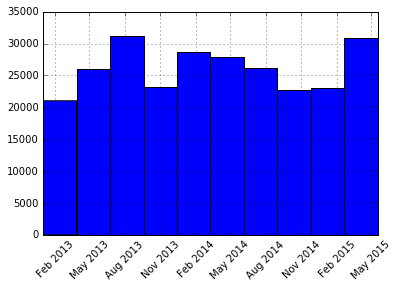

In [28]:
df_train.Original_Quote_Date.map(f).hist(xrot=45)

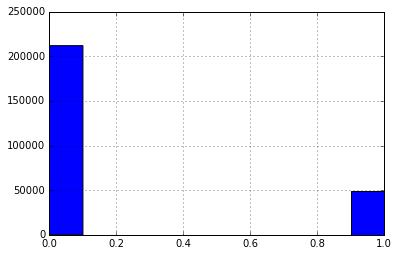

In [8]:
df_train.QuoteConversion_Flag.hist()

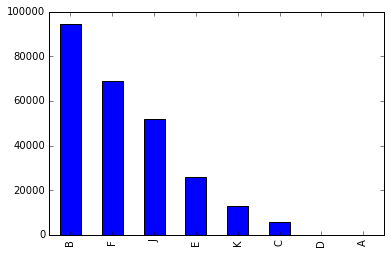

In [23]:
df_train.Field6.value_counts().plot(kind='bar')

QuoteConversion_Flag
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: Field7, dtype: object

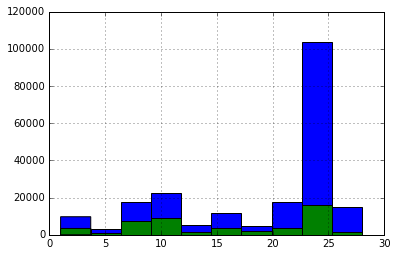

In [40]:
df_train.groupby('QuoteConversion_Flag').Field7.hist(alpha=0.4)
#df_train.groupby('QuoteConversion_Flag').Field8.hist(alpha=0.4)
#df_train.groupby('QuoteConversion_Flag').Field9.hist(alpha=0.4)
#df_train.groupby('QuoteConversion_Flag').Field11.hist(alpha=0.4)
#df_train.groupby('QuoteConversion_Flag').Field12.hist(alpha=0.4)

#df_train.hist(column = ['Field7', 'Field8', 'Field9','Field11', 'Field12'])

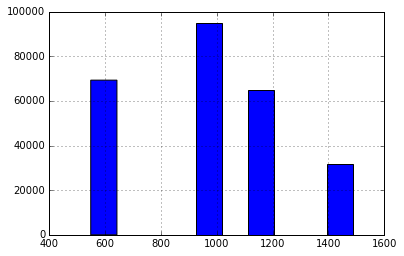

In [11]:
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
df_train.Field10.map(lambda x: locale.atoi(x)).hist()

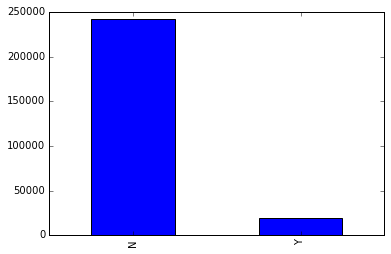

In [12]:
df_train.Field12.value_counts().plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a202150>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10c5c56d0>]], dtype=object)

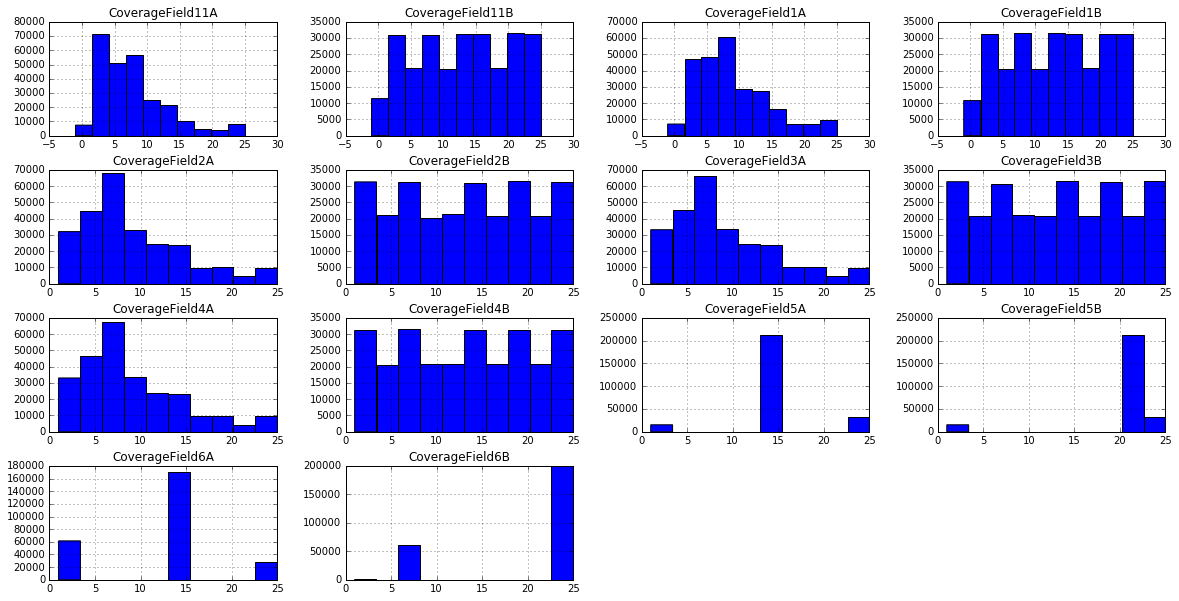

In [13]:
df_train.hist(column = ['CoverageField1A', 'CoverageField1B', 'CoverageField2A',
                        'CoverageField2B', 'CoverageField3A', 'CoverageField3B',
                        'CoverageField4A', 'CoverageField4B', 'CoverageField5A',
                        'CoverageField5B', 'CoverageField6A', 'CoverageField6B',
                        'CoverageField8', 'CoverageField9', 'CoverageField11A',
                        'CoverageField11B'],
              figsize=(20,10))



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1087dd550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10e072a50>]], dtype=object)

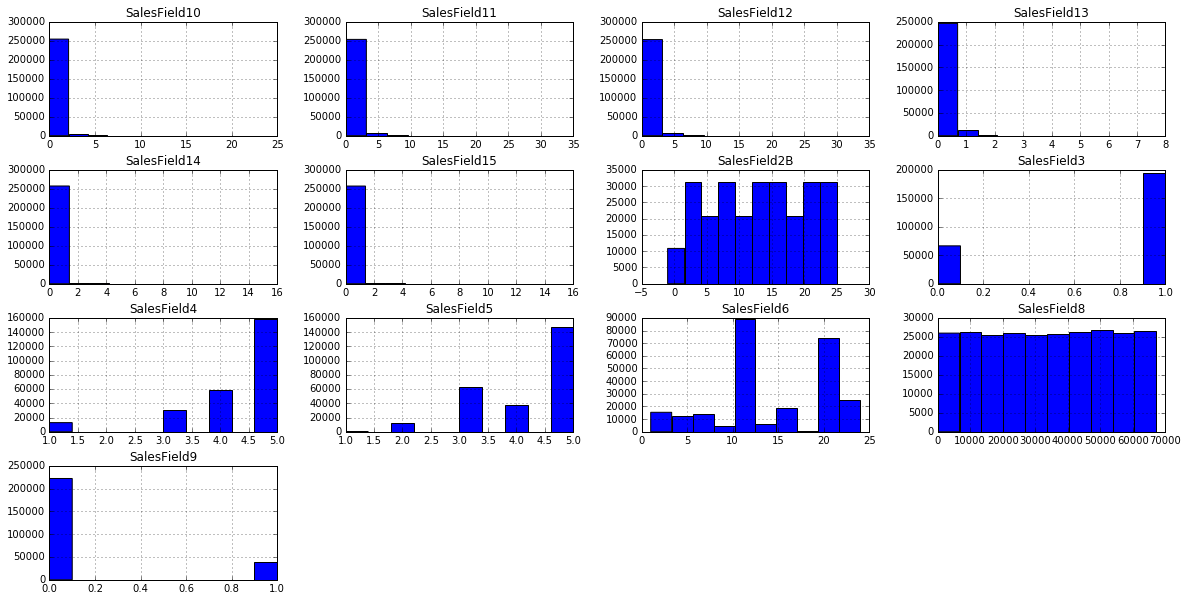

In [14]:
df_train.hist(column = ['SalesField2B', 'SalesField3', 'SalesField4', 'SalesField5',
       'SalesField6', 'SalesField7', 'SalesField8', 'SalesField9',
       'SalesField10', 'SalesField11', 'SalesField12', 'SalesField13',
       'SalesField14', 'SalesField15'],
             figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e71f2d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ac2a990>]], dtype=object)

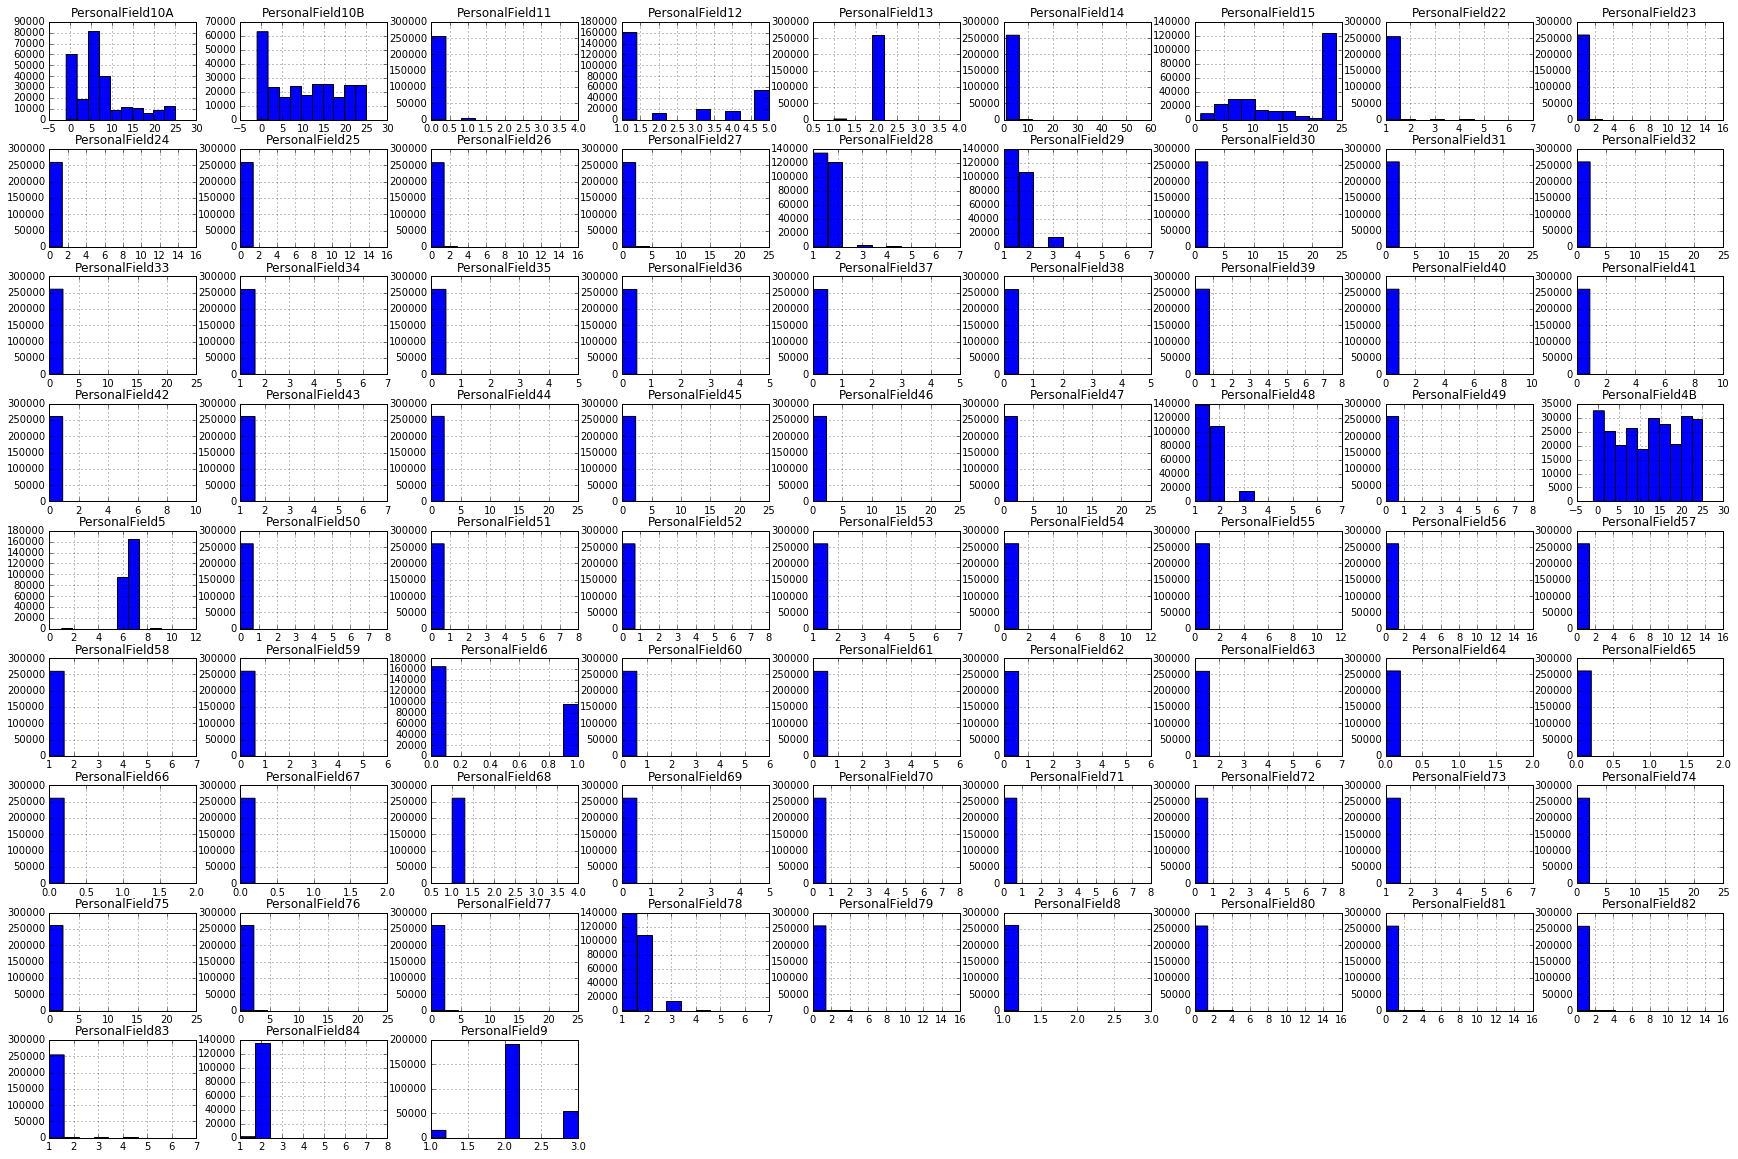

In [15]:
df_train.hist(column=[ 'PersonalField4B', 'PersonalField5',
       'PersonalField6', 'PersonalField7', 'PersonalField8',
       'PersonalField9', 'PersonalField10A', 'PersonalField10B',
       'PersonalField11', 'PersonalField12', 'PersonalField13',
       'PersonalField14', 'PersonalField15', 'PersonalField16',
       'PersonalField17', 'PersonalField18', 'PersonalField19',
       'PersonalField22', 'PersonalField23', 'PersonalField24',
       'PersonalField25', 'PersonalField26', 'PersonalField27',
       'PersonalField28', 'PersonalField29', 'PersonalField30',
       'PersonalField31', 'PersonalField32', 'PersonalField33',
       'PersonalField34', 'PersonalField35', 'PersonalField36',
       'PersonalField37', 'PersonalField38', 'PersonalField39',
       'PersonalField40', 'PersonalField41', 'PersonalField42',
       'PersonalField43', 'PersonalField44', 'PersonalField45',
       'PersonalField46', 'PersonalField47', 'PersonalField48',
       'PersonalField49', 'PersonalField50', 'PersonalField51',
       'PersonalField52', 'PersonalField53', 'PersonalField54',
       'PersonalField55', 'PersonalField56', 'PersonalField57',
       'PersonalField58', 'PersonalField59', 'PersonalField60',
       'PersonalField61', 'PersonalField62', 'PersonalField63',
       'PersonalField64', 'PersonalField65', 'PersonalField66',
       'PersonalField67', 'PersonalField68', 'PersonalField69',
       'PersonalField70', 'PersonalField71', 'PersonalField72',
       'PersonalField73', 'PersonalField74', 'PersonalField75',
       'PersonalField76', 'PersonalField77', 'PersonalField78',
       'PersonalField79', 'PersonalField80', 'PersonalField81',
       'PersonalField82', 'PersonalField83', 'PersonalField84'],
            figsize=(30,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11acc7e50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1150624d0>]], dtype=object)

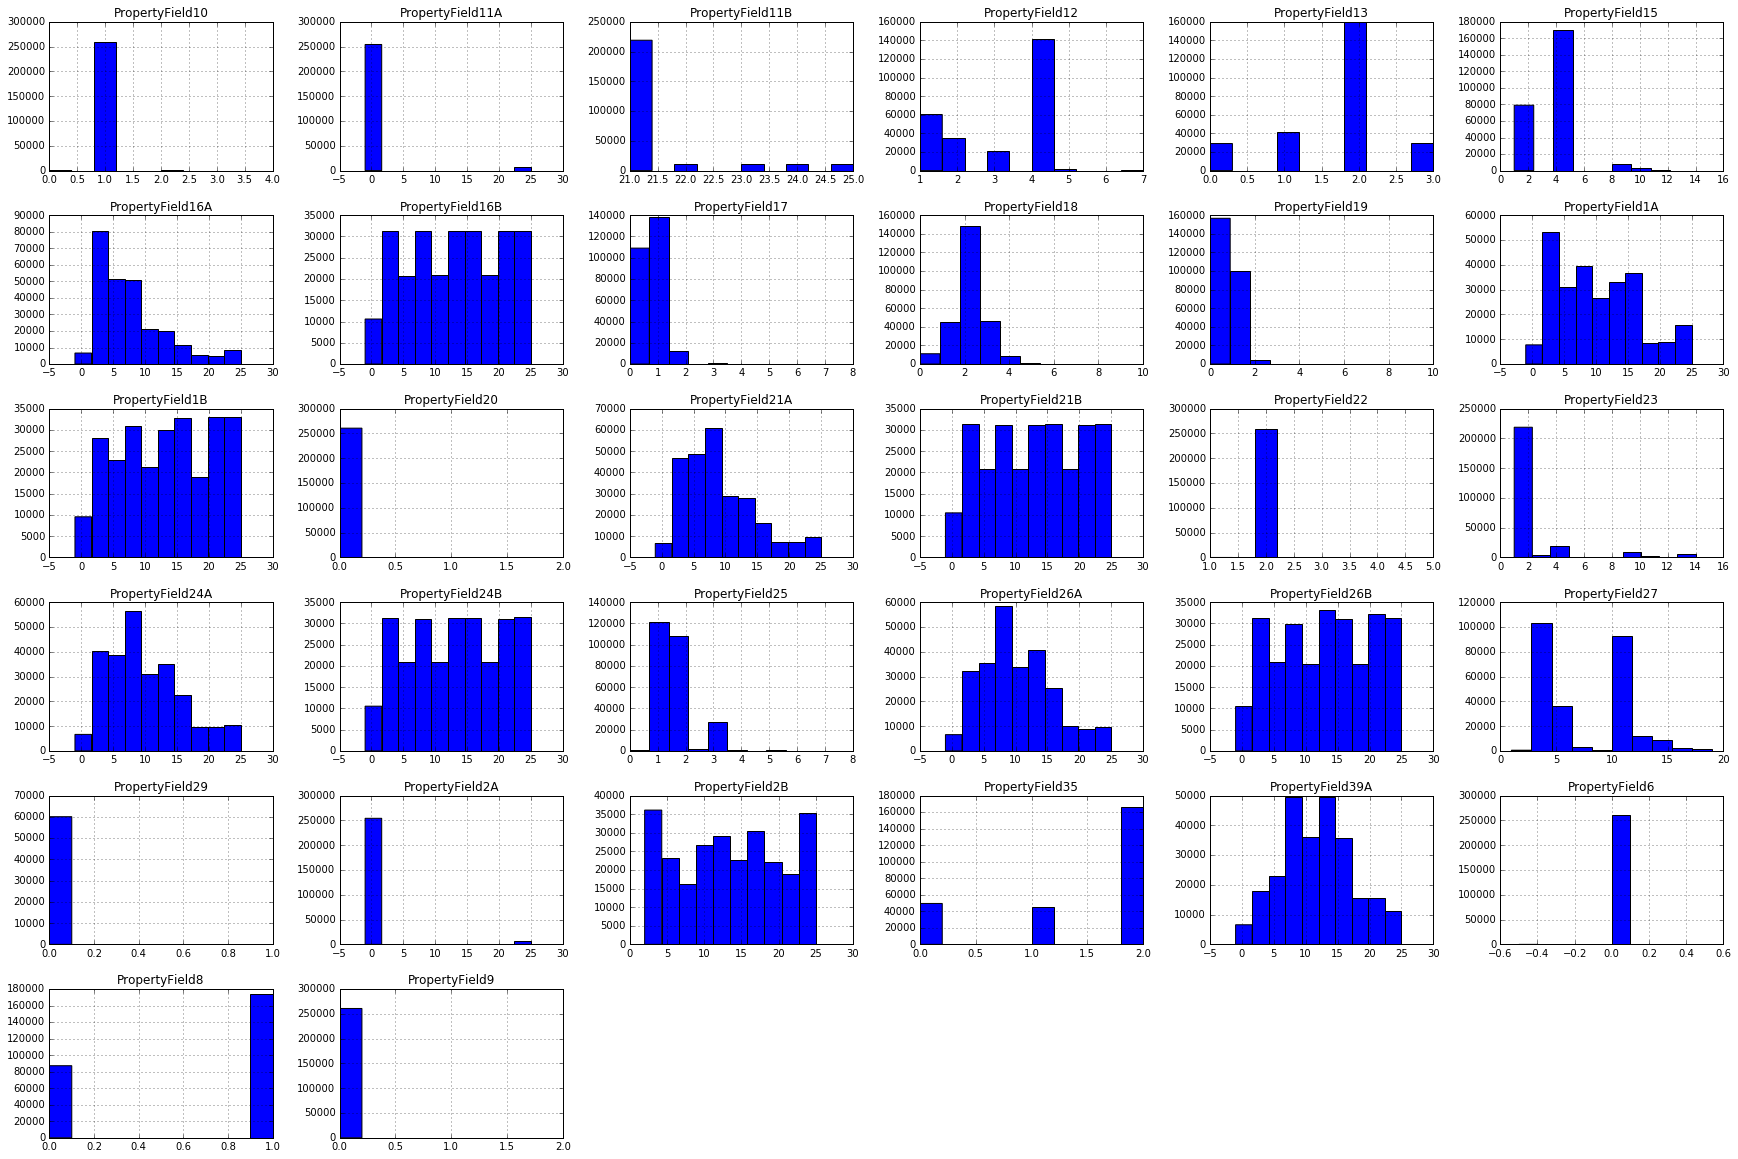

In [16]:
df_train.hist(column = [  'PropertyField1A', 'PropertyField1B', 'PropertyField2A',
       'PropertyField2B', 'PropertyField3', 'PropertyField4',
       'PropertyField5', 'PropertyField6', 'PropertyField7',
       'PropertyField8', 'PropertyField9', 'PropertyField10',
       'PropertyField11A', 'PropertyField11B', 'PropertyField12',
       'PropertyField13', 'PropertyField14', 'PropertyField15',
       'PropertyField16A', 'PropertyField16B', 'PropertyField17',
       'PropertyField18', 'PropertyField19', 'PropertyField20',
       'PropertyField21A', 'PropertyField21B', 'PropertyField22',
       'PropertyField23', 'PropertyField24A', 'PropertyField24B',
       'PropertyField25', 'PropertyField26A', 'PropertyField26B',
       'PropertyField27', 'PropertyField28', 'PropertyField29',
       'PropertyField30', 'PropertyField31', 'PropertyField32',
       'PropertyField33', 'PropertyField34', 'PropertyField35',
       'PropertyField36', 'PropertyField37', 'PropertyField38',
       'PropertyField39A'],
             figsize=(30,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115998110>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e07e950>]], dtype=object)

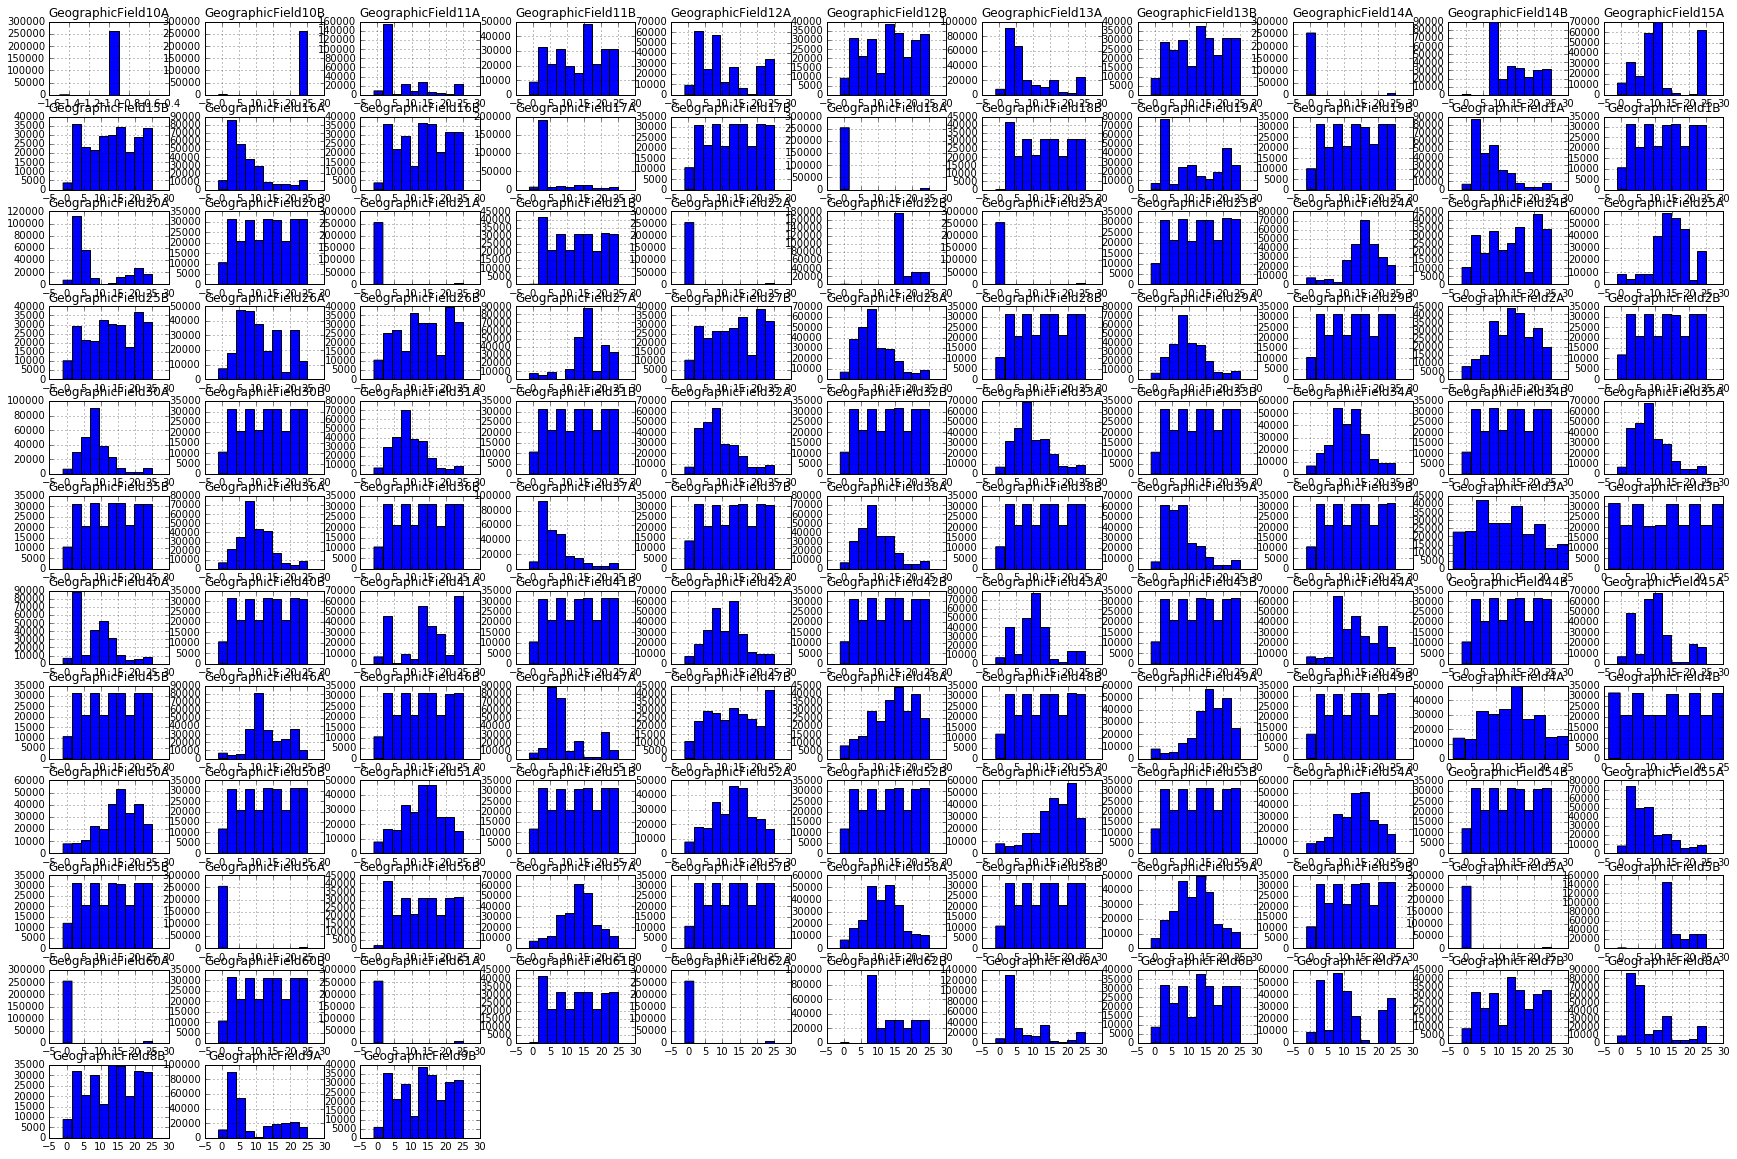

In [17]:
df_train.hist( column = ['GeographicField1A',
       'GeographicField1B', 'GeographicField2A', 'GeographicField2B',
       'GeographicField3A', 'GeographicField3B', 'GeographicField4A',
       'GeographicField4B', 'GeographicField5A', 'GeographicField5B',
       'GeographicField6A', 'GeographicField6B', 'GeographicField7A',
       'GeographicField7B', 'GeographicField8A', 'GeographicField8B',
       'GeographicField9A', 'GeographicField9B', 'GeographicField10A',
       'GeographicField10B', 'GeographicField11A', 'GeographicField11B',
       'GeographicField12A', 'GeographicField12B', 'GeographicField13A',
       'GeographicField13B', 'GeographicField14A', 'GeographicField14B',
       'GeographicField15A', 'GeographicField15B', 'GeographicField16A',
       'GeographicField16B', 'GeographicField17A', 'GeographicField17B',
       'GeographicField18A', 'GeographicField18B', 'GeographicField19A',
       'GeographicField19B', 'GeographicField20A', 'GeographicField20B',
       'GeographicField21A', 'GeographicField21B', 'GeographicField22A',
       'GeographicField22B', 'GeographicField23A', 'GeographicField23B',
       'GeographicField24A', 'GeographicField24B', 'GeographicField25A',
       'GeographicField25B', 'GeographicField26A', 'GeographicField26B',
       'GeographicField27A', 'GeographicField27B', 'GeographicField28A',
       'GeographicField28B', 'GeographicField29A', 'GeographicField29B',
       'GeographicField30A', 'GeographicField30B', 'GeographicField31A',
       'GeographicField31B', 'GeographicField32A', 'GeographicField32B',
       'GeographicField33A', 'GeographicField33B', 'GeographicField34A',
       'GeographicField34B', 'GeographicField35A', 'GeographicField35B',
       'GeographicField36A', 'GeographicField36B', 'GeographicField37A',
       'GeographicField37B', 'GeographicField38A', 'GeographicField38B',
       'GeographicField39A', 'GeographicField39B', 'GeographicField40A',
       'GeographicField40B', 'GeographicField41A', 'GeographicField41B',
       'GeographicField42A', 'GeographicField42B', 'GeographicField43A',
       'GeographicField43B', 'GeographicField44A', 'GeographicField44B',
       'GeographicField45A', 'GeographicField45B', 'GeographicField46A',
       'GeographicField46B', 'GeographicField47A', 'GeographicField47B',
       'GeographicField48A', 'GeographicField48B', 'GeographicField49A',
       'GeographicField49B', 'GeographicField50A', 'GeographicField50B',
       'GeographicField51A', 'GeographicField51B', 'GeographicField52A',
       'GeographicField52B', 'GeographicField53A', 'GeographicField53B',
       'GeographicField54A', 'GeographicField54B', 'GeographicField55A',
       'GeographicField55B', 'GeographicField56A', 'GeographicField56B',
       'GeographicField57A', 'GeographicField57B', 'GeographicField58A',
       'GeographicField58B', 'GeographicField59A', 'GeographicField59B',
       'GeographicField60A', 'GeographicField60B', 'GeographicField61A',
       'GeographicField61B', 'GeographicField62A', 'GeographicField62B',
       'GeographicField63'],
             figsize=(30,20))

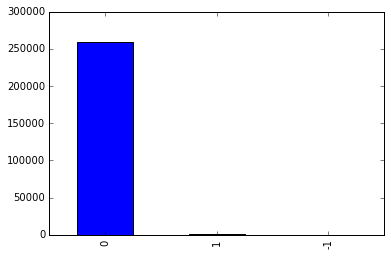

In [66]:
df_train.PersonalField7.value_counts().plot(kind='bar')

First let's convert all non-numeric columns to numeric (if possible) or drop them completely.

In [7]:
#Original_Quote_Date    object (date)
#Field6                 object (letters)
#Field10                object (need to convert to int)
#Field12                object (Y N)
#CoverageField8         object (letters)
#CoverageField9         object (letters)
#SalesField7            object (letters)
#PersonalField7         object (Y N)
#PersonalField16        object (two character strings, like ZA, XY, etc) - let's drop for now
#PersonalField17        object (two characters strings) - drop for now 
#PersonalField18        object (two characters strings) - drop for now
#PersonalField19        object (two characters strings) - drop for now
#PropertyField3         object (Y N)
#PropertyField4         object (Y N)
#PropertyField5         object (Y N)
#PropertyField14        object (letters)
#PropertyField28        object (letters)
#PropertyField30        object (Y N)
#PropertyField31        object (letters)
#PropertyField32        object (Y N)
#PropertyField33        object (letters)
#PropertyField34        object (Y N)
#PropertyField36        object (Y N)
#PropertyField37        object (Y N)
#PropertyField38        object (Y N)
#GeographicField63      object (Y N)
#GeographicField64      object - letters (looks like zip codes) - set CA: 1, NJ: 2, TX: 3, IL: 4

# Fields with empty rows
#PersonalField7     260640 (Y,N)
#PersonalField84    136545 (integer)
#PropertyField3     260672 (Y,N)
#PropertyField4     260690 (Y,N)
#PropertyField29     60068 (integer, mostly 0)
#PropertyField32    260683 (Y,N)
#PropertyField34    260683 (Y,N)
#PropertyField36    260640 (Y,N)
#PropertyField38    259533 (Y,N)


from sklearn import preprocessing

#yes_no_dict = {'Y':1, 'N':0}
#state_dict = {'CA': 1, 'NJ': 2, 'TX': 3, 'IL': 4}
#personal_dict = { 'Z': 1, 'Y': 2, 'X': 3 }

from datetime import datetime
f = lambda x: datetime.strptime(x, '%Y-%m-%d')

import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 

#record how many null columns there are
df_train['numNull'] = df_train.isnull().sum(axis=1)
df_test['numNull'] = df_test.isnull().sum(axis=1)

df_train = df_train.fillna(-1)
df_test = df_test.fillna(-1) 

def clean_up_data(df_train, df_test, data_type='train'):
    #Convert Original_Quote_date to proper date
    df_train.Original_Quote_Date = df_train.Original_Quote_Date.map(f)
    df_test.Original_Quote_Date = df_test.Original_Quote_Date.map(f)
    df_train['Year'] = df_train.Original_Quote_Date.apply(lambda x: int(str(x)[:4]))
    df_train['Month'] = df_train.Original_Quote_Date.apply(lambda x: int(str(x)[5:7]))
    df_train['weekday'] = df_train.Original_Quote_Date.dt.dayofweek

    df_test['Year'] = df_test.Original_Quote_Date.apply(lambda x: int(str(x)[:4]))
    df_test['Month'] = df_test.Original_Quote_Date.apply(lambda x: int(str(x)[5:7]))
    df_test['weekday'] = df_test.Original_Quote_Date.dt.dayofweek

    
    #Convert Field 10 to proper number
    df_train.Field10 = df_train.Field10.map(lambda x: locale.atoi(x))
    df_test.Field10 = df_test.Field10.map(lambda x: locale.atoi(x))
    # Let's convert all the Y N fields first
    for col in df_train.columns:
        if df_train[col].dtype=='object':
            print(col)
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(df_train[col].values) + list(df_test[col].values))
            df_train[col] = lbl.transform(list(df_train[col].values))
            df_test[col] = lbl.transform(list(df_test[col].values))

    #df.Field12 = df.Field12.map(lambda x: yes_no_dict[x] if pd.notnull(x) else -1)
    #df.PersonalField7 = df.PersonalField7.map(lambda x: yes_no_dict[x] if pd.notnull(x) else -1)
    #df.PropertyField3 = df.PropertyField3.map(lambda x: yes_no_dict[x] if pd.notnull(x) else -1)
    #df.PropertyField4 = df.PropertyField4.map(lambda x: yes_no_dict[x] if pd.notnull(x) else -1)
    #df.PropertyField5 = df.PropertyField5.map(lambda x: yes_no_dict[x] if pd.notnull(x) else -1)
    #df.PropertyField30 = df.PropertyField30.map(lambda x: yes_no_dict[x] if pd.notnull(x) else -1)
    #df.PropertyField32 = df.PropertyField32.map(lambda x: yes_no_dict[x] if pd.notnull(x) else -1)
    #df.PropertyField34 = df.PropertyField34.map(lambda x: yes_no_dict[x] if pd.notnull(x) else -1)
    #df.PropertyField36 = df.PropertyField36.map(lambda x: yes_no_dict[x] if pd.notnull(x) else -1)
    #df.PropertyField37 = df.PropertyField37.map(lambda x: yes_no_dict[x] if (x=='Y' or x=='N') else -1)
    #df.PropertyField38 = df.PropertyField38.map(lambda x: yes_no_dict[x] if pd.notnull(x) else -1)
    #df.GeographicField63 = df.GeographicField63.map(lambda x: yes_no_dict[x] if (x=='Y' or x=='N') else -1)    
    # Next let's convert all letter fields to ordinals
    #df.Field6 = [ ord(x) - 64 for x in df.Field6 ]
    #df.CoverageField8 = [ ord(x) - 64 for x in df.CoverageField8 ]
    #df.CoverageField9 = [ ord(x) - 64 for x in df.CoverageField9 ]
    #df.SalesField7 = [ ord(x) - 64 for x in df.SalesField7 ]
    #df.PropertyField7 = [ ord(x) - 64 for x in df.PropertyField7 ]
    #df.PropertyField14 = [ ord(x) - 64 for x in df.PropertyField14 ]
    #df.PropertyField28 = [ ord(x) - 64 for x in df.PropertyField28 ]
    #df.PropertyField31 = [ ord(x) - 64 for x in df.PropertyField31 ]
    #df.PropertyField33 = [ ord(x) - 64 for x in df.PropertyField33 ]
    # Convert GeographicField64 to numeric
    #df.GeographicField64 = df.GeographicField64.map(lambda x: state_dict[x] if pd.notnull(x) else -1)
    # Let's clean up some other Nans
    #df.PersonalField84 = df.PersonalField84.map(lambda x: x if pd.notnull(x) else -1)
    #df.PropertyField29 = df.PropertyField29.map(lambda x: x if pd.notnull(x) else -1)
    #df.PersonalField16 = df.PersonalField16.map(lambda x:  personal_dict[x[:1]] if pd.notnull(x) else -1)
    #df.PersonalField17 = df.PersonalField17.map(lambda x:  personal_dict[x[:1]] if pd.notnull(x) else -1)
    #df.PersonalField18 = df.PersonalField18.map(lambda x:  personal_dict[x[:1]] if pd.notnull(x) else -1)
    #df.PersonalField19 = df.PersonalField19.map(lambda x:  personal_dict[x[:1]] if pd.notnull(x) else -1)
    # Now let's drop the rest
    #df.drop(['QuoteNumber','Original_Quote_Date','PersonalField16','PersonalField17','PersonalField18','PersonalField19'], axis=1, inplace=True)
    df_train.drop(['QuoteNumber','Original_Quote_Date'], axis=1, inplace=True)
    #df.drop(['Original_Quote_Date','PersonalField16','PersonalField17','PersonalField18','PersonalField19'], axis=1, inplace=True)
    df_test.drop(['Original_Quote_Date'], axis=1, inplace=True)
    return df_train, df_test

In [8]:
df_train_clean, df_test_clean = clean_up_data(df_train, df_test)

Field6
Field12
CoverageField8
CoverageField9
SalesField7
PersonalField7
PersonalField16
PersonalField17
PersonalField18
PersonalField19
PropertyField3
PropertyField4
PropertyField5
PropertyField7
PropertyField14
PropertyField28
PropertyField30
PropertyField31
PropertyField32
PropertyField33
PropertyField34
PropertyField36
PropertyField37
PropertyField38
GeographicField63
GeographicField64


In [9]:
# Confirm that there are no more object-field columns
data_types = df_train_clean.dtypes

data_types[data_types=='object']

Series([], dtype: object)

In [10]:
# Check that there are no more empty cells
check_for_nans = df_train_clean.isnull().sum()
check_for_nans[check_for_nans>0]

Series([], dtype: int64)

In [11]:
df_train_clean.head()

,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,CoverageField1B,...,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64,numNull,Year,Month,weekday
0,0,1,23,0.9403,0.0006,965,1.0200,0,17,23,...,-1,18,-1,10,1,0,0,2013,8,4
1,0,5,7,1.0006,0.0040,548,1.2433,0,6,8,...,-1,17,-1,20,1,2,2,2014,4,1
2,0,5,7,1.0006,0.0040,548,1.2433,0,7,12,...,-1,11,-1,8,1,2,2,2014,8,0
3,0,6,10,0.9769,0.0004,1165,1.2665,0,3,2,...,-1,9,-1,21,1,3,2,2013,4,0
4,0,4,23,0.9472,0.0006,1487,1.3045,0,8,13,...,-1,11,-1,12,1,1,0,2014,1,5


QuoteConversion_Flag
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: CoverageField1B, dtype: object

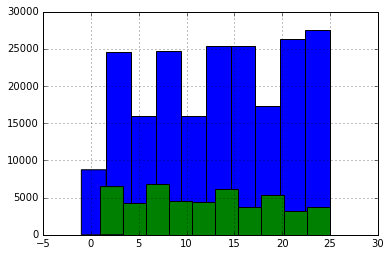

In [12]:
df_train_clean.groupby('QuoteConversion_Flag').CoverageField1B.hist(alpha='0.4')

In [170]:
len(df_train_clean.columns)

302

In [15]:
train_data = df_train_clean.values
len(train_data)

260753

Now let's try training a BDT to this:

In [75]:
from sklearn import ensemble
clf = ensemble.GradientBoostingClassifier()

In [76]:
from sklearn import cross_validation
cross_validation.cross_val_score(clf, train_data[0::,1::], train_data[0::,0])

KeyboardInterrupt: 

Ooo, not too bad.  Let's train for real now.

In [ ]:
clf_fit = clf.fit(train_data[0::,1::], train_data[0::,0])

In [ ]:
clf_fit.score(train_data[0::,1::], train_data[0::,0])

Now let's clean up the test dataset.

In [16]:
test_data = df_test_clean.values
len(test_data)

173836

In [ ]:
output_clf = clf_fit.predict_proba(test_data[0::,1::])

In [ ]:
output_clf

In [ ]:
output_clf_probs = [i[1] for i in output_clf]

In [85]:
ids = df_test_clean['QuoteNumber'].values

In [ ]:
ids

In [ ]:
import csv
predictions_file = open("bdt_results_2.csv", "wb")
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["QuoteNumber","QuoteConversion_Flag"])
open_file_object.writerows(zip(ids, output_clf_probs))
predictions_file.close()

Results: 0.95993
Not too bad!  But still 1000 spots out (top spot: 0.97)

## xgboost

Let's try using xgboost instead.

In [120]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_clean.ix[:,1:],df_train_clean.ix[:,0:1], 
                                           test_size = 0.4, random_state=1)

In [121]:
import xgboost as xgb
xg_train = xgb.DMatrix(X_train.values, label=y_train.values)
xg_test = xgb.DMatrix(X_test.values, label=y_test.values)

In [64]:
# setup parameters for xgboost
param = {}

# use softmax multi-class classification
#param['objective'] = 'multi:softmax'
# do the same thing again, but output probabilities
param['objective'] = 'binary:logistic'

# scale weight of positive examples
param['eta'] = 0.01 #param['eta'] = 1
param['max_depth'] = 6 #param['max_depth'] = 2
param['silent'] = 1
#param['nthread'] = 4
#param['num_class'] = 10

watchlist = [ (xg_train,'train'), (xg_test, 'test') ]
num_round = 4000 #num_round = 1750 #num_round = 100

bst = xgb.train(param, xg_train, num_round, watchlist ) # is this right?  why am I only training on 60% of the data?

[0]	train-error:0.093250	test-error:0.092539
[1]	train-error:0.093243	test-error:0.092539
[2]	train-error:0.093243	test-error:0.092539
[3]	train-error:0.093243	test-error:0.092529
[4]	train-error:0.093243	test-error:0.092529
[5]	train-error:0.093243	test-error:0.092539
[6]	train-error:0.093243	test-error:0.092529
[7]	train-error:0.093243	test-error:0.092539
[8]	train-error:0.093243	test-error:0.092539
[9]	train-error:0.093243	test-error:0.092539
[10]	train-error:0.093243	test-error:0.092539
[11]	train-error:0.093243	test-error:0.092539
[12]	train-error:0.093237	test-error:0.092539
[13]	train-error:0.093243	test-error:0.092539
[14]	train-error:0.093237	test-error:0.092539
[15]	train-error:0.093243	test-error:0.092539
[16]	train-error:0.093237	test-error:0.092539
[17]	train-error:0.093237	test-error:0.092539
[18]	train-error:0.093224	test-error:0.092529
[19]	train-error:0.093224	test-error:0.092529
[20]	train-error:0.093224	test-error:0.092529
[21]	train-error:0.093224	test-error:0.09252

Lowest error (before adding numNull and quote date columns) at 1750 = 0.0721

In [125]:
xg_test_final = xgb.DMatrix(test_data[0::,1::])
preds = bst.predict(xg_test_final)

NameError: name 'bst' is not defined

In [ ]:
preds

In [132]:
import csv
predictions_file = open("xgboost_results_small_eta_more_features_4.csv", "wb")
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["QuoteNumber","QuoteConversion_Flag"])
open_file_object.writerows(zip(ids, preds))
predictions_file.close()

At about 0.966 now.

In [123]:
# setup parameters for xgboost
param = {}

# use softmax multi-class classification
#param['objective'] = 'multi:softmax'
# do the same thing again, but output probabilities
param['objective'] = 'binary:logistic'

# scale weight of positive examples
param['eta'] = 0.01 #param['eta'] = 1
param['max_depth'] = 6 #param['max_depth'] = 2
param['silent'] = 1
param['subsample'] = 0.83
param['colsample_bytree'] = 0.77
#param['nthread'] = 4
#param['num_class'] = 10

watchlist = [ (xg_train,'train'), (xg_test, 'test') ]
num_round = 4000 #num_round = 1750 #num_round = 100

bst2 = xgb.train(param, xg_train, num_round, watchlist)

[0]	train-error:0.111735	test-error:0.111062
[1]	train-error:0.105905	test-error:0.105204
[2]	train-error:0.092713	test-error:0.092223
[3]	train-error:0.090533	test-error:0.089950
[4]	train-error:0.091965	test-error:0.091638
[5]	train-error:0.088699	test-error:0.088416
[6]	train-error:0.088302	test-error:0.087496
[7]	train-error:0.089964	test-error:0.089653
[8]	train-error:0.088622	test-error:0.088263
[9]	train-error:0.088648	test-error:0.088340
[10]	train-error:0.089504	test-error:0.089020
[11]	train-error:0.088302	test-error:0.087947
[12]	train-error:0.088724	test-error:0.088253
[13]	train-error:0.088743	test-error:0.088263
[14]	train-error:0.090450	test-error:0.089567
[15]	train-error:0.091198	test-error:0.090305
[16]	train-error:0.090086	test-error:0.089557
[17]	train-error:0.090265	test-error:0.089682
[18]	train-error:0.089101	test-error:0.088608
[19]	train-error:0.089236	test-error:0.088800
[20]	train-error:0.088974	test-error:0.088416
[21]	train-error:0.089108	test-error:0.08860

In [126]:
preds = bst2.predict(xg_test_final)

In [138]:
preds_train = bst2.predict(xg_train)

QuoteConversion_Flag
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: BDT, dtype: object

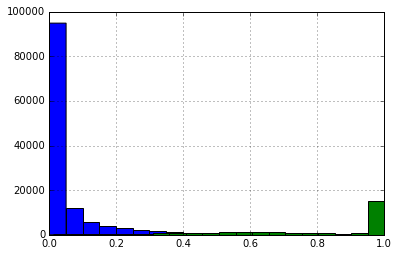

In [144]:
explore = y_train
explore['BDT'] = preds_train
explore.groupby('QuoteConversion_Flag').BDT.hist(bins=20)

In [127]:
def importance_XGB(clf):
    impdf = []
    for ft, score in clf.get_fscore().iteritems():
        impdf.append({'feature': ft, 'importance': score})
    impdf = pd.DataFrame(impdf)
    impdf = impdf.sort_values(by='importance', ascending=False).reset_index(drop=True)
    impdf['importance'] /= impdf['importance'].sum()
    return impdf

In [128]:
importances = importance_XGB(bst2)

In [172]:
importances.head()

,feature,importance
0,f32,0.025371
1,f24,0.015132
2,f50,0.014424
3,f56,0.013236
4,f30,0.012981


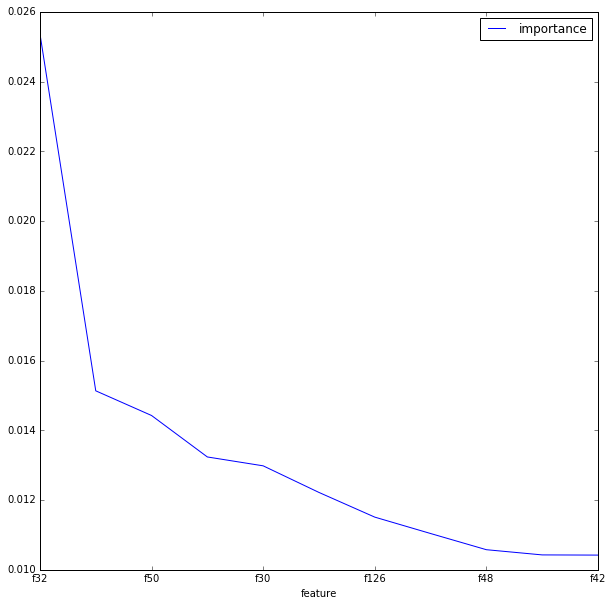

In [131]:
importances.ix[:10].plot(x = 'feature', y = 'importance', figsize=(10,10))

In [85]:
df_train_clean.ix[:,35:45].head()

,SalesField10,SalesField11,SalesField12,SalesField13,SalesField14,SalesField15,PersonalField1,PersonalField2,PersonalField4A,PersonalField4B
0,0,0,0,0,0,0,0,0,-1,-1
1,0,1,1,0,0,0,1,1,14,19
2,0,2,2,0,0,0,1,1,16,21
3,0,0,0,0,0,0,1,1,2,2
4,0,0,0,0,0,0,1,1,20,24


In [55]:
df_train_clean.ix[:,165:170].head()

,PropertyField35,PropertyField36,PropertyField37,PropertyField38,PropertyField39A
0,2,1,1,1,7
1,2,1,1,1,11
2,2,1,1,1,23
3,2,1,2,1,24
4,0,1,1,1,18


QuoteConversion_Flag
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: SalesField15, dtype: object

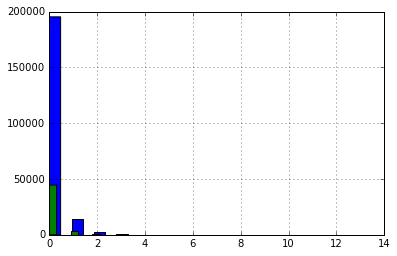

In [88]:
df_train_clean.groupby('QuoteConversion_Flag').SalesField15.hist(bins=30)

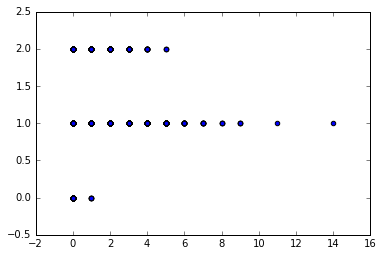

In [91]:
plt.scatter(df_train_clean['SalesField15'], df_train_clean['PropertyField36'])
#df_train_clean.plot(x='SalesField15', y='PropertyField36', style='o')

In [103]:
all_feature_names = df_train_clean.columns.values[1:]
#for feature in all_feature_names:
#    print feature
#    df_train_clean.groupby('QuoteConversion_Flag')[feature].hist(alpha=0.5)
#df_train_clean.groupby('QuoteConversion_Flag').SalesField7.hist(alpha=0.5)
len(all_feature_names)

300

## Try random forest

What if we try adding the BDT output as another feature into the random forest?  I guess this is called stacking?

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators = 500, n_jobs=-1, random_state=123, verbose=1)

Use the full training set now.  Why didn't we do this for the BDT?

In [159]:
xg_train_full = xgb.DMatrix(df_train_clean.ix[:,1:].values, label= df_train_clean.ix[:,0:1].values )

In [150]:
preds_train_clean = bst2.predict(xg_train_full)

In [158]:
df_train_clean_rf = df_train_clean
df_train_clean_rf['BDT'] = preds_train_clean
train_data_rf = df_train_clean_rf.values

In [156]:
train_data_rf

260753
260753


array([[  0.00000000e+00,   1.00000000e+00,   2.30000000e+01, ...,
          8.00000000e+00,   4.00000000e+00,   1.18816706e-05],
       [  0.00000000e+00,   5.00000000e+00,   7.00000000e+00, ...,
          4.00000000e+00,   1.00000000e+00,   3.75918187e-02],
       [  0.00000000e+00,   5.00000000e+00,   7.00000000e+00, ...,
          8.00000000e+00,   0.00000000e+00,   5.99817224e-02],
       ..., 
       [  0.00000000e+00,   5.00000000e+00,   1.10000000e+01, ...,
          2.00000000e+00,   1.00000000e+00,   1.64662066e-04],
       [  0.00000000e+00,   5.00000000e+00,   7.00000000e+00, ...,
          4.00000000e+00,   1.00000000e+00,   9.37103182e-02],
       [  0.00000000e+00,   5.00000000e+00,   1.50000000e+01, ...,
          3.00000000e+00,   1.00000000e+00,   7.13744015e-02]])

In [45]:
from sklearn import cross_validation
cross_validation.cross_val_score(clf_rf, train_data[0::,1::], train_data[0::,0])

Exception in thread Thread-13:
Traceback (most recent call last):
  File "/usr/local/Cellar/python/2.7.11/Frameworks/Python.framework/Versions/2.7/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/usr/local/Cellar/python/2.7.11/Frameworks/Python.framework/Versions/2.7/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/usr/local/Cellar/python/2.7.11/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/pool.py", line 405, in _handle_results
    cache[job]._set(i, obj)
  File "/usr/local/Cellar/python/2.7.11/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/pool.py", line 572, in _set
    self._callback(self._value)
  File "/usr/local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py", line 227, in __call__
    self.parallel.dispatch_next()
  File "/usr/local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py", line 596, in dispatch_nex

KeyboardInterrupt: 

So about 92% accuracy only with 500 estimators.  (1000 estimators doesn't do any better).
With the BDT prediction included as an additional feature, the accuracy goes up to about 95%.  Hm interesting... because the accuracy of the BDT prediction alone was 93%.  Did this actually improve the overall prediction?

In [46]:
clf_rf_fit = clf_rf.fit(train_data[0::,1::], train_data[0::,0])

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.2min finished


Sanity check training score:

In [47]:
clf_rf_fit.score(train_data[0::,1::], train_data[0::,0])

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    5.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   11.7s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:   13.4s finished


1.0

In [163]:
xg_test_final = xgb.DMatrix(test_data[0::,1::])
preds_test_final = bst2.predict(xg_test_final)

In [164]:
df_test_clean_rf = df_test_clean
df_test_clean_rf['BDT'] = preds_test_final
test_data_rf = df_test_clean_rf.values

In [48]:
output_clf_rf = clf_rf_fit.predict_proba(test_data[0::,1::])

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    7.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    8.1s finished


In [49]:
import csv
output_clf_probs = [i[1] for i in output_clf_rf]
predictions_file = open("rf_results_2.csv", "wb")
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["QuoteNumber","QuoteConversion_Flag"])
open_file_object.writerows(zip(ids, output_clf_probs))
predictions_file.close()

Didn't seem to have worked.  LB score is 0.96395, less than 0.96712 from xgb alone.

In [87]:
output_clf_rf

array([[ 0.976,  0.024],
       [ 0.958,  0.042],
       [ 0.976,  0.024],
       ..., 
       [ 0.258,  0.742],
       [ 0.994,  0.006],
       [ 0.584,  0.416]])

What if we try averaging the xgboost and RF submissions?

In [50]:
# Bagging submissions
# https://github.com/MLWave/Kaggle-Ensemble-Guide/blob/master/kaggle_avg.py
from collections import defaultdict
from glob import glob


def kaggle_bag(glob_files, loc_outfile, method="average", weights="uniform"):
  if method == "average":
    scores = defaultdict(float)
  with open(loc_outfile,"wb") as outfile:
    for i, glob_file in enumerate( glob(glob_files) ):
      print "parsing:", glob_file
      # sort glob_file by first column, ignoring the first line
      lines = open(glob_file).readlines()
      lines = [lines[0]] + sorted(lines[1:])
      for e, line in enumerate( lines ):
        if i == 0 and e == 0:
          outfile.write(line)
        if e > 0:
          row = line.strip().split(",")
          scores[(e,row[0])] += float(row[1])
    for j,k in sorted(scores):
      outfile.write("%s,%f\n"%(k,scores[(j,k)]/(i+1)))
    print("wrote to %s"%loc_outfile)



In [94]:
kaggle_bag('best_submission_*.csv', 'bagged_results.csv')

parsing: best_submission_rf.csv
parsing: best_submission_xgboost.csv
wrote to bagged_results.csv


In [51]:
kaggle_bag('bag_1/*', 'bagged_rf_lr_results.csv')

parsing: bag_1/lr_results.csv
parsing: bag_1/rf_results_2.csv
wrote to bagged_rf_lr_results.csv


Didn't do better than the xboost result alone.  Let's try instead the stacking procedure:

# XGBoost stacking

Divide your training data in two disjoint parts A and B.

* learn on A than predict B (=> predB) and test data (=> predT1)
* learn on B than predict A (=> predA) and test data (=> predT2).
* build a new feature meta_train out of predA & predB for the training data
* build a new feature meta_test = 0.5*(predT1 + predT2) for the test data
* add meta_train to training & meta_test to test data
* learn on entire training data

In [186]:
# setup parameters for xgboost
param = {}

# use softmax multi-class classification
#param['objective'] = 'multi:softmax'
# do the same thing again, but output probabilities
param['objective'] = 'binary:logistic'

# scale weight of positive examples
param['eta'] = 0.01 #param['eta'] = 1
param['max_depth'] = 6 #param['max_depth'] = 2
param['silent'] = 1
param['subsample'] = 0.83
param['colsample_bytree'] = 0.77
#param['nthread'] = 4
#param['num_class'] = 10

watchlist = [ (xg_test,'train'), (xg_train, 'test') ]
num_round = 4000 

bst3 = xgb.train(param, xg_test, num_round, watchlist)

[0]	train-error:0.101283	test-error:0.102805
[1]	train-error:0.101666	test-error:0.102709
[2]	train-error:0.091130	test-error:0.091633
[3]	train-error:0.088723	test-error:0.089421
[4]	train-error:0.089116	test-error:0.089651
[5]	train-error:0.089960	test-error:0.090853
[6]	train-error:0.089490	test-error:0.090399
[7]	train-error:0.088589	test-error:0.089268
[8]	train-error:0.088972	test-error:0.089626
[9]	train-error:0.087093	test-error:0.088130
[10]	train-error:0.087189	test-error:0.088226
[11]	train-error:0.087295	test-error:0.088354
[12]	train-error:0.087227	test-error:0.088315
[13]	train-error:0.088867	test-error:0.089817
[14]	train-error:0.089078	test-error:0.090130
[15]	train-error:0.089787	test-error:0.090603
[16]	train-error:0.089203	test-error:0.090201
[17]	train-error:0.089241	test-error:0.090271
[18]	train-error:0.087889	test-error:0.088910
[19]	train-error:0.088081	test-error:0.088948
[20]	train-error:0.088714	test-error:0.089523
[21]	train-error:0.087582	test-error:0.08857

Ok let's do some stacking.

In [189]:
# we want to add the BDT prediction of bdst2 to X_test and
# add the BDT prediction of bdst3 to X_train
# and add the average prediction of bdst2 and bdst3 to df_test_clean

X_test_augment = X_test
preds_bdst2 = bst2.predict(xg_test)  # remember, bst2 was trained on xg_train
X_test_augment['BDT'] = preds_bdst2

X_train_augment = X_train
preds_bdst3 = bst3.predict(xg_train) # remember, bst3 was trained on xg_test
X_train_augment['BDT'] = preds_bdst3

In [197]:
# Now we combine the features back together
X_full_augment = pd.concat([X_train_augment, X_test_augment])
print len(X_full_augment)
X_full_augment = X_full_augment.sort_index()
X_full_augment.head()

260753


,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,CoverageField1B,CoverageField2A,...,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64,numNull,Year,Month,weekday,BDT
0,1,23,0.9403,0.0006,965,1.0200,0,17,23,17,...,18,-1,10,1,0,0,2013,8,4,0.000024
1,5,7,1.0006,0.0040,548,1.2433,0,6,8,6,...,17,-1,20,1,2,2,2014,4,1,0.037592
2,5,7,1.0006,0.0040,548,1.2433,0,7,12,7,...,11,-1,8,1,2,2,2014,8,0,0.094730
3,6,10,0.9769,0.0004,1165,1.2665,0,3,2,3,...,9,-1,21,1,3,2,2013,4,0,0.000234
4,4,23,0.9472,0.0006,1487,1.3045,0,8,13,8,...,11,-1,12,1,1,0,2014,1,5,0.000060


In [194]:
df_train_clean.head()

,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,CoverageField1B,...,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64,numNull,Year,Month,weekday,BDT
0,0,1,23,0.9403,0.0006,965,1.0200,0,17,23,...,18,-1,10,1,0,0,2013,8,4,0.000012
1,0,5,7,1.0006,0.0040,548,1.2433,0,6,8,...,17,-1,20,1,2,2,2014,4,1,0.037592
2,0,5,7,1.0006,0.0040,548,1.2433,0,7,12,...,11,-1,8,1,2,2,2014,8,0,0.059982
3,0,6,10,0.9769,0.0004,1165,1.2665,0,3,2,...,9,-1,21,1,3,2,2013,4,0,0.000234
4,0,4,23,0.9472,0.0006,1487,1.3045,0,8,13,...,11,-1,12,1,1,0,2014,1,5,0.000060


In [199]:
# And train on the whole shebang
xg_full_augment = xgb.DMatrix(X_full_augment.values, label=df_train_clean.ix[:,0:1].values)

X_train_watch, X_test_watch, y_train_watch, y_test_watch = train_test_split(X_full_augment.ix[:,0:],
                                                                            df_train_clean.ix[:,0:1], 
                                                                            test_size = 0.5, 
                                                                            random_state=1)
xg_train_watch = xgb.DMatrix(X_train_watch.values, label=y_train_watch.values)
xg_test_watch = xgb.DMatrix(X_test_watch.values, label=y_test_watch.values)

#final prediction
watchlist = [ (xg_train_watch,'train'), (xg_test_watch, 'test') ]
bst_final = xgb.train(param, xg_full_augment, num_round, watchlist)

[0]	train-error:0.073058	test-error:0.071531
[1]	train-error:0.079094	test-error:0.077728
[2]	train-error:0.079961	test-error:0.078879
[3]	train-error:0.081165	test-error:0.080889
[4]	train-error:0.076310	test-error:0.075435
[5]	train-error:0.077859	test-error:0.076701
[6]	train-error:0.075919	test-error:0.074614
[7]	train-error:0.074899	test-error:0.073548
[8]	train-error:0.075696	test-error:0.074223
[9]	train-error:0.075980	test-error:0.074829
[10]	train-error:0.076579	test-error:0.075427
[11]	train-error:0.075551	test-error:0.074499
[12]	train-error:0.074661	test-error:0.073771
[13]	train-error:0.075489	test-error:0.074576
[14]	train-error:0.074929	test-error:0.074031
[15]	train-error:0.075044	test-error:0.074062
[16]	train-error:0.074707	test-error:0.073617
[17]	train-error:0.074300	test-error:0.073096
[18]	train-error:0.073925	test-error:0.072850
[19]	train-error:0.074262	test-error:0.073103
[20]	train-error:0.073971	test-error:0.072889
[21]	train-error:0.073764	test-error:0.07261

In [200]:
# Meanwhile, the test set must also be augmented

preds_bst2_test = bst2.predict(xg_test_final)
preds_bst3_test = bst3.predict(xg_test_final)

df_test_clean_augment = df_test_clean.copy()
df_test_clean_augment['BDT'] = 0.5 * (preds_bst2_test + preds_bst3_test)
test_data_augment = df_test_clean_augment.values

In [201]:
# Save all the models
bst2.save_model('bst2.model')
bst3.save_model('bst3.model')
bst_final.save_model('bst_final.model')

In [203]:
# Now for the final prediction
xg_test_final_augment = xgb.DMatrix(test_data_augment[0::,1::])
preds_bst_final = bst_final.predict(xg_test_final_augment)

In [204]:
ids = df_test_clean['QuoteNumber'].values

import csv
predictions_file = open("xgboost_results_stacked.csv", "wb")
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["QuoteNumber","QuoteConversion_Flag"])
open_file_object.writerows(zip(ids, preds_bst_final))
predictions_file.close()

This stacked result gave the best LB result yet: 0.96788. (good for 758th place...)

In [206]:
df_test_clean_augment.head()

,QuoteNumber,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,CoverageField1B,...,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64,numNull,Year,Month,weekday,BDT
0,3,4,16,0.9364,0.0006,1487,1.3045,0,4,4,...,20,-1,25,2,1,2,2014,8,1,0.001239
1,5,5,11,0.9919,0.0038,564,1.1886,0,8,14,...,5,-1,21,1,2,2,2013,9,5,0.026746
2,7,5,15,0.8945,0.0038,564,1.0670,0,11,18,...,22,-1,11,1,2,2,2013,3,4,0.024777
3,9,7,21,0.8870,0.0004,1113,1.2665,1,14,22,...,8,-1,21,1,3,2,2015,3,5,0.006165
4,10,1,25,0.9153,0.0007,935,1.0200,0,4,5,...,22,-1,21,1,0,1,2014,12,2,0.367928


## Logistic Regression

In [13]:
from sklearn import linear_model

clf_lr = linear_model.LogisticRegression()

In [17]:
from sklearn import cross_validation
cross_validation.cross_val_score(clf_lr, train_data[0::,1::], train_data[0::,0])

array([ 0.88461538,  0.90173497,  0.84668132])

In [35]:
from sklearn.grid_search import GridSearchCV
params = {}
params['C'] = [0.1, 0.25, 0.5, 0.75, 1]
params['penalty'] = ['l1', 'l2']
gs = GridSearchCV(clf_lr, params)
gs.fit(X=train_data[0::,1::], y=train_data[0::,0])

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 0.25, 0.5, 0.75, 1]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [36]:
print gs.best_score_
gs.best_estimator_

0.916196553827


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
output_clf_lr = gs.best_estimator_.predict_proba(test_data[0::,1::])

In [38]:
output_clf_lr

array([[ 0.99108699,  0.00891301],
       [ 0.95855829,  0.04144171],
       [ 0.96216448,  0.03783552],
       ..., 
       [ 0.03046717,  0.96953283],
       [ 0.998445  ,  0.001555  ],
       [ 0.90303231,  0.09696769]])

In [40]:
output_clf_lr_probs = [i[1] for i in output_clf_lr]
ids = df_test_clean['QuoteNumber'].values

import csv
predictions_file = open("lr_results.csv", "wb")
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["QuoteNumber","QuoteConversion_Flag"])
open_file_object.writerows(zip(ids, output_clf_lr_probs))
predictions_file.close()

Any gains in averaging the averaged lr+rf predictions with this stacked GBT prediction?

In [52]:
kaggle_bag('bag_2/*', 'bagged_rf_lr_stackedxgboost_results.csv')

parsing: bag_2/bagged_rf_lr_results.csv
parsing: bag_2/xgboost_results_stacked.csv
wrote to bagged_rf_lr_stackedxgboost_results.csv


This only gives a LB result of 0.96635, not an improvement over the stacked results 0.96788.

In [59]:
clf_rf_fit.feature_importances_

array([  1.17009075e-03,   8.05973600e-03,   2.61509221e-03,
         1.56247944e-03,   3.55368515e-03,   1.70740376e-03,
         2.04703991e-04,   2.67238767e-03,   3.09566154e-03,
         2.69942228e-03,   3.05905616e-03,   3.60654800e-03,
         3.93514441e-03,   2.83316872e-03,   3.20742652e-03,
         1.57426600e-03,   1.60032288e-03,   3.27731587e-03,
         3.76554751e-03,   6.58083390e-03,   1.32497237e-02,
         7.41327597e-03,   7.84766527e-03,   1.32370129e-02,
         1.45513761e-02,   5.03773147e-03,   6.95759574e-03,
         3.68376627e-03,   2.55709574e-02,   5.57990660e-02,
         5.83805021e-03,   2.60605203e-03,   6.20300781e-03,
         8.55328765e-04,   2.21301557e-03,   2.19573121e-03,
         2.24470435e-03,   5.11902215e-04,   6.05153649e-04,
         6.21932984e-04,   1.80466880e-02,   7.89917285e-03,
         9.91077081e-03,   9.35931277e-03,   8.52331335e-04,
         7.65562451e-04,   1.03790571e-04,   2.28406965e-07,
         2.50603011e-02,

In [53]:
max_value = max(clf_rf_fit.feature_importances_)
max_index = clf_rf_fit.feature_importances_.tolist().index(max_value)
max_index

166

In [84]:
#max_value = max(gs.best_estimator_.coef_.ravel().tolist())
#max_index = gs.best_estimator_.coef_.ravel().tolist().index(max_value)
#max_index

import heapq
top_two = heapq.nlargest(2, gs.best_estimator_.coef_.ravel().tolist())

print gs.best_estimator_.coef_.ravel().tolist().index(top_two[0])
print gs.best_estimator_.coef_.ravel().tolist().index(top_two[1])


166
40


In [54]:
clf_rf_fit.n_features_

300

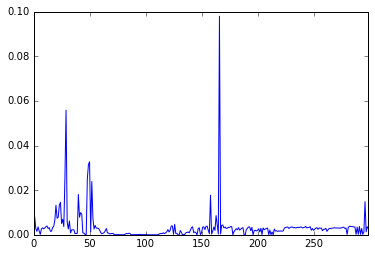

In [116]:
pd.Series(clf_rf_fit.feature_importances_).plot()

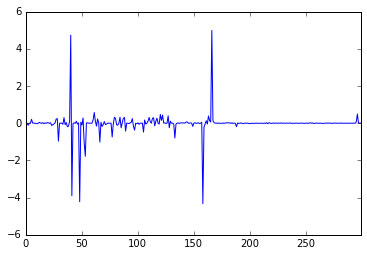

In [81]:
pd.Series(gs.best_estimator_.coef_.ravel()).plot()

In [95]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [96]:
X_r = pca.fit(train_data[0::,1::]).transform(train_data[0::,1::])

explained variance ratio (first two components): [  9.99756143e-01   2.24191057e-04]


/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


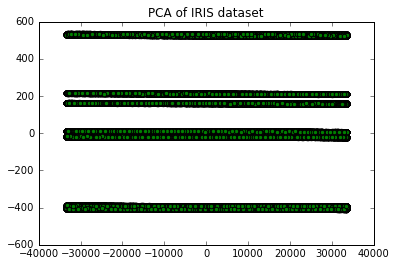

In [99]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
for c, i in zip("rgb", [0, 1]):
    plt.scatter(X_r[train_data[0::,0] == i, 0], X_r[train_data[0::,0] == i, 1], c=c)
plt.legend()
plt.title('PCA of Homesite dataset')

## MLP 

In [96]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(train_data[0::,1::])  
#X_train = scaler.transform(X_train)  
# apply same transformation to test data
#X_test = scaler.transform(X_test)  

StandardScaler(copy=True, with_mean=True, with_std=True)

In [99]:
X_train_scaled = scaler.transform(train_data[0::,1::])
X_test_scaled = scaler.transform(test_data[0::,1::])

In [98]:
X_train_scaled

array([[-1.22682015,  0.63751807,  0.0526961 , ..., -1.06887278,
         0.70329434,  0.88225365],
       [ 0.60437535, -1.52968474,  1.67866095, ...,  0.30759727,
        -0.50695135, -0.75894245],
       [ 0.60437535, -1.52968474,  1.67866095, ...,  0.30759727,
         0.70329434, -1.30600781],
       ..., 
       [ 0.60437535, -0.98788404,  0.81309757, ...,  0.30759727,
        -1.1120742 , -0.75894245],
       [ 0.60437535, -1.52968474,  1.67866095, ...,  0.30759727,
        -0.50695135, -0.75894245],
       [ 0.60437535, -0.44608333, -1.18228219, ..., -1.06887278,
        -0.80951277, -0.75894245]])

In [100]:
X_test_scaled

array([[ 0.14657647, -0.31063316, -0.05246581, ...,  0.30759727,
         0.70329434, -0.75894245],
       [ 0.60437535, -0.98788404,  1.44406901, ..., -1.06887278,
         1.00585576,  1.42931902],
       [ 0.60437535, -0.44608333, -1.18228219, ..., -1.06887278,
        -0.80951277,  0.88225365],
       ..., 
       [-1.22682015,  0.90841843, -0.62141869, ...,  0.30759727,
        -0.80951277,  1.42931902],
       [ 1.06217422,  1.0438686 , -1.24430075, ...,  0.30759727,
        -0.80951277,  1.42931902],
       [ 0.60437535, -0.98788404,  1.44406901, ..., -1.06887278,
         1.61097861,  0.88225365]])

In [112]:
len(X_train_scaled)

260753

In [134]:
#rom sklearn.neural_network import MLPClassifier
#clf = MLPClassifier(algorithm='l-bfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
from nolearn.lasagne import NeuralNet
from lasagne.layers import InputLayer
from lasagne.layers import DenseLayer
from lasagne.nonlinearities import sigmoid
from lasagne.nonlinearities import softmax
from lasagne.updates import nesterov_momentum

net1 = NeuralNet(
    layers=[  # three layers: one hidden layer
        ('input', InputLayer),
        ('hidden1', DenseLayer),
        ('output', DenseLayer),
        ],
    # input layer
    input_shape=(None, 300),
    # hidden layers
    hidden1_num_units=100,
    hidden1_nonlinearity=sigmoid,
    # output layer
    output_nonlinearity=softmax,
    output_num_units=2,
    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,
    #regression=False,  # flag to indicate we're dealing with regression problem
    max_epochs=10,  # we want to train this many epochs
    verbose=1,
    )

In [140]:
from theano import In
net1.fit(X_train_scaled.astype(np.int32),train_data[0::,0].astype(np.int32))

NotImplementedError: In() instances and tuple inputs trigger the old semantics, which disallow using updates and givens

In [116]:
train_data[0::,0].astype(np.float32)

array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

In [122]:
X_train_scaled

array([[-1.22682015,  0.63751807,  0.0526961 , ..., -1.06887278,
         0.70329434,  0.88225365],
       [ 0.60437535, -1.52968474,  1.67866095, ...,  0.30759727,
        -0.50695135, -0.75894245],
       [ 0.60437535, -1.52968474,  1.67866095, ...,  0.30759727,
         0.70329434, -1.30600781],
       ..., 
       [ 0.60437535, -0.98788404,  0.81309757, ...,  0.30759727,
        -1.1120742 , -0.75894245],
       [ 0.60437535, -1.52968474,  1.67866095, ...,  0.30759727,
        -0.50695135, -0.75894245],
       [ 0.60437535, -0.44608333, -1.18228219, ..., -1.06887278,
        -0.80951277, -0.75894245]])

In [123]:
train_data[0::,0]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [133]:
type(clf_rf_fit.n_features_)

int

In [143]:
from sknn.mlp import Classifier, Layer

nn = Classifier(
    layers=[
        Layer("Sigmoid", units=100, dropout=0.15),
        Layer("Softmax")],
    learning_rate=0.001,
    n_iter=125)
nn.fit(X_train_scaled, train_data[0::,0])

Classifier(batch_size=1, callback=None, debug=False, dropout_rate=None,
      f_stable=0.001,
      hidden0=<sknn.nn.Layer `Sigmoid`: units=100, name=u'hidden0', frozen=False, pieces=2>,
      layers=[<sknn.nn.Layer `Sigmoid`: units=100, name=u'hidden0', frozen=False, pieces=2>, <sknn.nn.Layer `Softmax`: units=2, name=u'output', frozen=False>],
      learning_momentum=0.9, learning_rate=0.001, learning_rule=u'sgd',
      loss_type=None, n_iter=125, n_stable=10,
      output=<sknn.nn.Layer `Softmax`: units=2, name=u'output', frozen=False>,
      random_state=None, regularize=None, valid_set=None, valid_size=0.0,
      verbose=None, warning=None, weight_decay=None, weights=None)

In [144]:
y_nn_preds = nn.predict_proba(X_test_scaled)

In [145]:
y_nn_preds

array([[  9.99924421e-01,   7.55901929e-05],
       [  9.98468220e-01,   1.53179059e-03],
       [  9.97314751e-01,   2.68523721e-03],
       ..., 
       [  3.08825256e-04,   9.99691188e-01],
       [  9.99976158e-01,   2.38657667e-05],
       [  9.63220000e-01,   3.67800258e-02]], dtype=float32)

In [158]:
output_nn_probs = [i[1] for i in y_nn_preds]
ids = df_test_clean['QuoteNumber'].values

import csv
predictions_file = open("nn_results.csv", "wb")
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["QuoteNumber","QuoteConversion_Flag"])
open_file_object.writerows(zip(ids, output_nn_probs))
predictions_file.close()

This gave 0.94688.  Not bad!  Let's see what happens when I add some dropout and increased the number of nodes in the hidden layer

In [150]:
len(output_nn_probs)

173836

In [154]:
nn2 = Classifier(
    layers=[
        Layer("Sigmoid", units=150, dropout=0.20),
        Layer("Softmax")],
    learning_rate=0.001,
    n_iter=125)
nn2.fit(X_train_scaled, train_data[0::,0])

Classifier(batch_size=1, callback=None, debug=False, dropout_rate=None,
      f_stable=0.001,
      hidden0=<sknn.nn.Layer `Sigmoid`: units=150, name=u'hidden0', frozen=False, dropout=0.2>,
      layers=[<sknn.nn.Layer `Sigmoid`: units=150, name=u'hidden0', frozen=False, dropout=0.2>, <sknn.nn.Layer `Softmax`: units=2, name=u'output', frozen=False>],
      learning_momentum=0.9, learning_rate=0.001, learning_rule=u'sgd',
      loss_type=None, n_iter=125, n_stable=10,
      output=<sknn.nn.Layer `Softmax`: units=2, name=u'output', frozen=False>,
      random_state=None, regularize=None, valid_set=None, valid_size=0.0,
      verbose=None, warning=None, weight_decay=None, weights=None)

In [155]:
y_nn2_preds = nn2.predict_proba(X_test_scaled)

In [157]:
output_nn2_probs = [i[1] for i in y_nn2_preds]
ids = df_test_clean['QuoteNumber'].values

import csv
predictions_file = open("nn2_results.csv", "wb")
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["QuoteNumber","QuoteConversion_Flag"])
open_file_object.writerows(zip(ids, output_nn2_probs))
predictions_file.close()

0.95839 on the LB!  Alright, now let's average the nn2 and stacked bst together.

In [159]:
kaggle_bag('bag_3/*', 'bagged_nn_stackedxgboost_results.csv')

parsing: bag_3/nn2_results.csv
parsing: bag_3/xgboost_results_stacked.csv
wrote to bagged_nn_stackedxgboost_results.csv


With this averaged results, I get 0.96607 on the LB.  (Compare with 0.96788 for stacked-xgboost only).

Here's a hail-Mary shot at bagging everything together.

In [160]:
kaggle_bag('bag_4/*', 'bagged_lr_rf_nn_stackedxgboost_results.csv')

parsing: bag_4/bagged_rf_lr_results.csv
parsing: bag_4/nn2_results.csv
parsing: bag_4/xgboost_results_stacked.csv
wrote to bagged_lr_rf_nn_stackedxgboost_results.csv


Only 0.96580...

In [161]:
nn3 = Classifier(
    layers=[
        Layer("Sigmoid", units=200, dropout=0.20),
        Layer("Softmax")],
    learning_rate=0.001,
    n_iter=200)
nn3.fit(X_train_scaled, train_data[0::,0])

Classifier(batch_size=1, callback=None, debug=False, dropout_rate=None,
      f_stable=0.001,
      hidden0=<sknn.nn.Layer `Sigmoid`: units=200, name=u'hidden0', frozen=False, dropout=0.2>,
      layers=[<sknn.nn.Layer `Sigmoid`: units=200, name=u'hidden0', frozen=False, dropout=0.2>, <sknn.nn.Layer `Softmax`: units=2, name=u'output', frozen=False>],
      learning_momentum=0.9, learning_rate=0.001, learning_rule=u'sgd',
      loss_type=None, n_iter=200, n_stable=10,
      output=<sknn.nn.Layer `Softmax`: units=2, name=u'output', frozen=False>,
      random_state=None, regularize=None, valid_set=None, valid_size=0.0,
      verbose=None, warning=None, weight_decay=None, weights=None)

In [162]:
y_nn3_preds = nn3.predict_proba(X_test_scaled)

In [163]:
output_nn3_probs = [i[1] for i in y_nn3_preds]
ids = df_test_clean['QuoteNumber'].values

import csv
predictions_file = open("nn3_results.csv", "wb")
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["QuoteNumber","QuoteConversion_Flag"])
open_file_object.writerows(zip(ids, output_nn3_probs))
predictions_file.close()

Now it's 0.95594 (Compare with 0.95839 for nn2).